<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model" data-toc-modified-id="Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Identification" data-toc-modified-id="Identification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Identification</a></span></li><li><span><a href="#Estimation" data-toc-modified-id="Estimation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Estimation</a></span><ul class="toc-item"><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Read Data</a></span></li></ul></li></ul></div>

In [6]:
''' import packages '''
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint

# Model

In [7]:
'''
The SEIRD model differential equations
y = (S, E, I, R, D)
t - a grid of time point in T days
N - total population
Parameters of model:
    alpha - Case Fatality Ratio = dead / total number of infected
    beta - transmission rate
    lambd - proportin of all cases being observed
Clinical parameters:
    gamma - estimates duration of illness
    sigma - estimates incubation period
R=beta/gamma - reproduction number
'''


def deriv(y, t, N, alpha, beta, gamma, lambd, sigma):
    S, E, I, R, D, C = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * gamma * I
    dCdt = lambd * gamma * I
    return dSdt, dEdt, dIdt, dRdt, dDdt, dCdt


def params(E0, I0, t_start, t_end, alpha, R, lambd, N=10e6, R0=0, D0=0, t_delta=1.0, gamma=1/18, sigma=0.2):
    S0 = N - I0 - E0 - R0 - D0
    C0 = I0
    y0 = S0, E0, I0, R0, D0, C0
    t_range = np.arange(1-t_start, t_end+t_delta, t_delta)
    beta = R * gamma
    args = (N, alpha, beta, gamma, lambd, sigma)
    return y0, t_range, args

# Identification

In [8]:
'''
Follow Korolev and Compare three SEIRD models with different parameter sets.
Short-term: 60 days.
Long-term: 240 days.
Slow epidemic: Gamma fixed at 1/18, sigma fixed at 0.2.
Model 1: CFR=0.01, lambd=0.2, E0=2, I0=2, T0=2, R=5;
Model 2: CFR=0.005, lambd=01, E0=4, I0=4, T0=2, R=5;
Model 3: CFR=0.004, lambd=0.08, E0=2, I0=2, T0=10, R=5;
Model 4: CFR=0.01, lambd=0.2, R=5;
Model 5: CFR=0.01, lambd=0.2, R=3;
Model 6: CFR=0.05, lambd=0.8, R=3;
'''

y01_ST, t1_ST, args1_ST = params(E0=2, I0=2, t_start=2, t_end=60, alpha=.01, R=5, lambd=.2)
ret1_ST = odeint(deriv, y01_ST, t1_ST, args=args1_ST)
S1_ST, E1_ST, I1_ST, R1_ST, D1_ST, C1_ST = ret1_ST.T

y02_ST, t2_ST, args2_ST = params(E0=4, I0=4, t_start=2, t_end=60, alpha=.005, R=5, lambd=.1)
ret2_ST = odeint(deriv, y02_ST, t2_ST, args=args2_ST)
S2_ST, E2_ST, I2_ST, R2_ST, D2_ST, C2_ST = ret2_ST.T

y03_ST, t3_ST, args3_ST = params(E0=2, I0=2, t_start=10, t_end=60, alpha=.004, R=5, lambd=.08)
ret3_ST = odeint(deriv, y03_ST, t3_ST, args=args3_ST)
S3_ST, E3_ST, I3_ST, R3_ST, D3_ST, C3_ST = ret3_ST.T

y01_LT, t1_LT, args1_LT = params(E0=2, I0=2, t_start=2, t_end=240, alpha=.01, R=5, lambd=.2)
ret1_LT = odeint(deriv, y01_LT, t1_LT, args=args1_LT)
S1_LT, E1_LT, I1_LT, R1_LT, D1_LT, C1_LT = ret1_LT.T

y02_LT, t2_LT, args2_LT = params(E0=4, I0=4, t_start=2, t_end=240, alpha=.005, R=5, lambd=.1)
ret2_LT = odeint(deriv, y02_LT, t2_LT, args=args2_LT)
S2_LT, E2_LT, I2_LT, R2_LT, D2_LT, C2_LT = ret2_LT.T

y03_LT, t3_LT, args3_LT = params(E0=2, I0=2, t_start=10, t_end=240, alpha=.004, R=5, lambd=.08)
ret3_LT = odeint(deriv, y03_LT, t3_LT, args=args3_LT)
S3_LT, E3_LT, I3_LT, R3_LT, D3_LT, C3_LT = ret3_LT.T

y04_ST, t4_ST, args4_ST = params(E0=2, I0=2, t_start=2, t_end=60, alpha=0.01, R=5, lambd=0.2)
ret4_ST = odeint(deriv, y04_ST, t4_ST, args=args4_ST)
S4_ST, E4_ST, I4_ST, R4_ST, D4_ST, C4_ST = ret4_ST.T

y05_ST, t5_ST, args5_ST = params(E0=4, I0=4, t_start=2, t_end=60, alpha=0.01, R=3, lambd=0.2)
ret5_ST = odeint(deriv, y05_ST, t5_ST, args=args5_ST)
S5_ST, E5_ST, I5_ST, R5_ST, D5_ST, C5_ST = ret5_ST.T

y06_ST, t6_ST, args6_ST = params(E0=2, I0=2, t_start=10, t_end=60, alpha=0.05, R=3, lambd=0.8)
ret6_ST = odeint(deriv, y06_ST, t6_ST, args=args6_ST)
S6_ST, E6_ST, I6_ST, R6_ST, D6_ST, C6_ST = ret6_ST.T

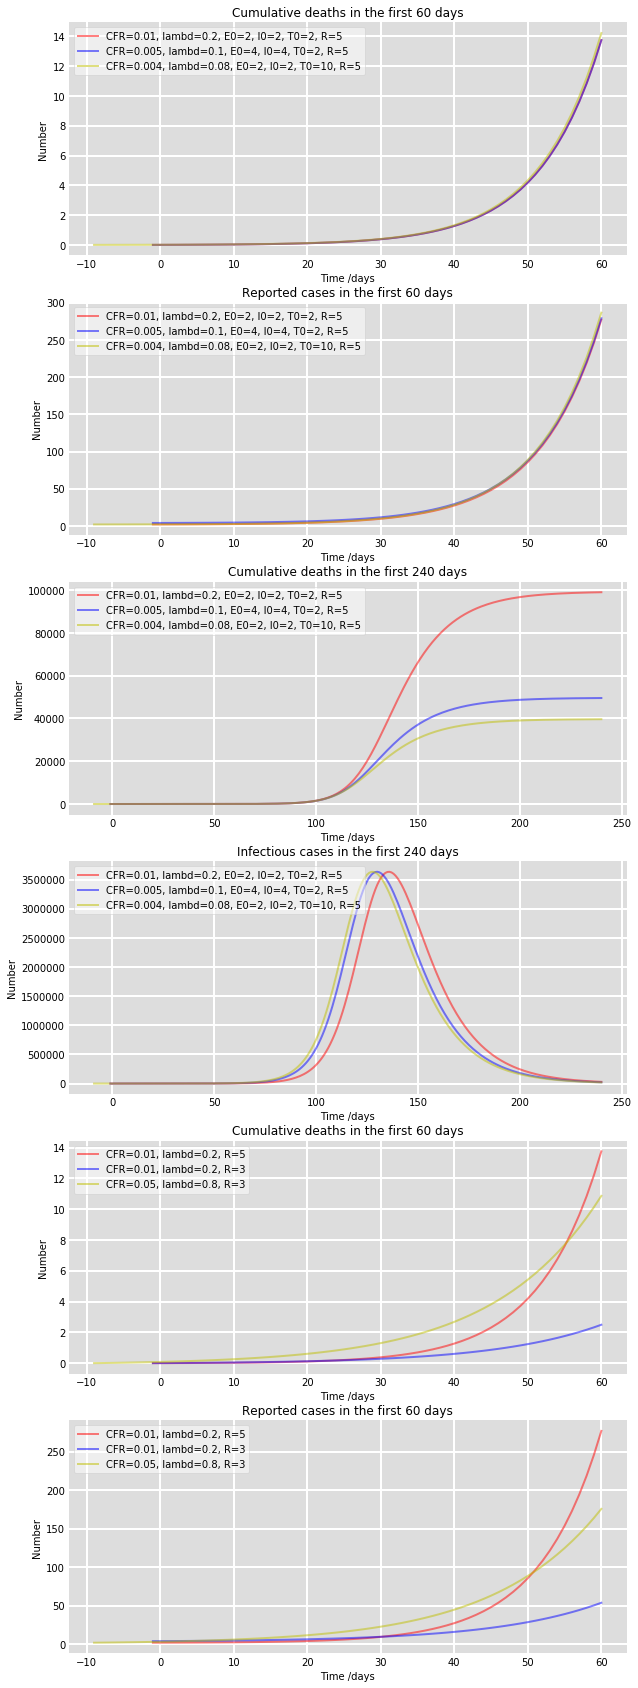

In [9]:
'''
Plot the data
'''
fig = plt.figure(facecolor='w', figsize=(10, 30))

ax1 = fig.add_subplot(6, 1, 1, facecolor='#dddddd', axisbelow=True)
ax1.plot(t1_ST, D1_ST, 'r', alpha=0.5, lw=2, label='CFR=0.01, lambd=0.2, E0=2, I0=2, T0=2, R=5')
ax1.plot(t2_ST, D2_ST, 'b', alpha=0.5, lw=2, label='CFR=0.005, lambd=0.1, E0=4, I0=4, T0=2, R=5')
ax1.plot(t3_ST, D3_ST, 'y', alpha=0.5, lw=2, label='CFR=0.004, lambd=0.08, E0=2, I0=2, T0=10, R=5')
ax1.set_title('Cumulative deaths in the first 60 days')

ax2 = fig.add_subplot(6, 1, 2, facecolor='#dddddd', axisbelow=True)
ax2.plot(t1_ST, C1_ST, 'r', alpha=0.5, lw=2, label='CFR=0.01, lambd=0.2, E0=2, I0=2, T0=2, R=5')
ax2.plot(t2_ST, C2_ST, 'b', alpha=0.5, lw=2, label='CFR=0.005, lambd=0.1, E0=4, I0=4, T0=2, R=5')
ax2.plot(t3_ST, C3_ST, 'y', alpha=0.5, lw=2, label='CFR=0.004, lambd=0.08, E0=2, I0=2, T0=10, R=5')
ax2.set_title('Reported cases in the first 60 days')

ax3 = fig.add_subplot(6, 1, 3, facecolor='#dddddd', axisbelow=True)
ax3.plot(t1_LT, D1_LT, 'r', alpha=0.5, lw=2, label='CFR=0.01, lambd=0.2, E0=2, I0=2, T0=2, R=5')
ax3.plot(t2_LT, D2_LT, 'b', alpha=0.5, lw=2, label='CFR=0.005, lambd=0.1, E0=4, I0=4, T0=2, R=5')
ax3.plot(t3_LT, D3_LT, 'y', alpha=0.5, lw=2, label='CFR=0.004, lambd=0.08, E0=2, I0=2, T0=10, R=5')
ax3.set_title('Cumulative deaths in the first 240 days')

ax4 = fig.add_subplot(6, 1, 4, facecolor='#dddddd', axisbelow=True)
ax4.plot(t1_LT, I1_LT, 'r', alpha=0.5, lw=2, label='CFR=0.01, lambd=0.2, E0=2, I0=2, T0=2, R=5')
ax4.plot(t2_LT, I2_LT, 'b', alpha=0.5, lw=2, label='CFR=0.005, lambd=0.1, E0=4, I0=4, T0=2, R=5')
ax4.plot(t3_LT, I3_LT, 'y', alpha=0.5, lw=2, label='CFR=0.004, lambd=0.08, E0=2, I0=2, T0=10, R=5')
ax4.set_title('Infectious cases in the first 240 days')

ax5 = fig.add_subplot(6, 1, 5, facecolor='#dddddd', axisbelow=True)
ax5.plot(t4_ST, D4_ST, 'r', alpha=0.5, lw=2, label='CFR=0.01, lambd=0.2, R=5')
ax5.plot(t5_ST, D5_ST, 'b', alpha=0.5, lw=2, label='CFR=0.01, lambd=0.2, R=3')
ax5.plot(t6_ST, D6_ST, 'y', alpha=0.5, lw=2, label='CFR=0.05, lambd=0.8, R=3')
ax5.set_title('Cumulative deaths in the first 60 days')

ax6 = fig.add_subplot(6, 1, 6, facecolor='#dddddd', axisbelow=True)
ax6.plot(t4_ST, C4_ST, 'r', alpha=0.5, lw=2, label='CFR=0.01, lambd=0.2, R=5')
ax6.plot(t5_ST, C5_ST, 'b', alpha=0.5, lw=2, label='CFR=0.01, lambd=0.2, R=3')
ax6.plot(t6_ST, C6_ST, 'y', alpha=0.5, lw=2, label='CFR=0.05, lambd=0.8, R=3')
ax6.set_title('Reported cases in the first 60 days')

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    
plt.show()

NameError: name 'ax25' is not defined

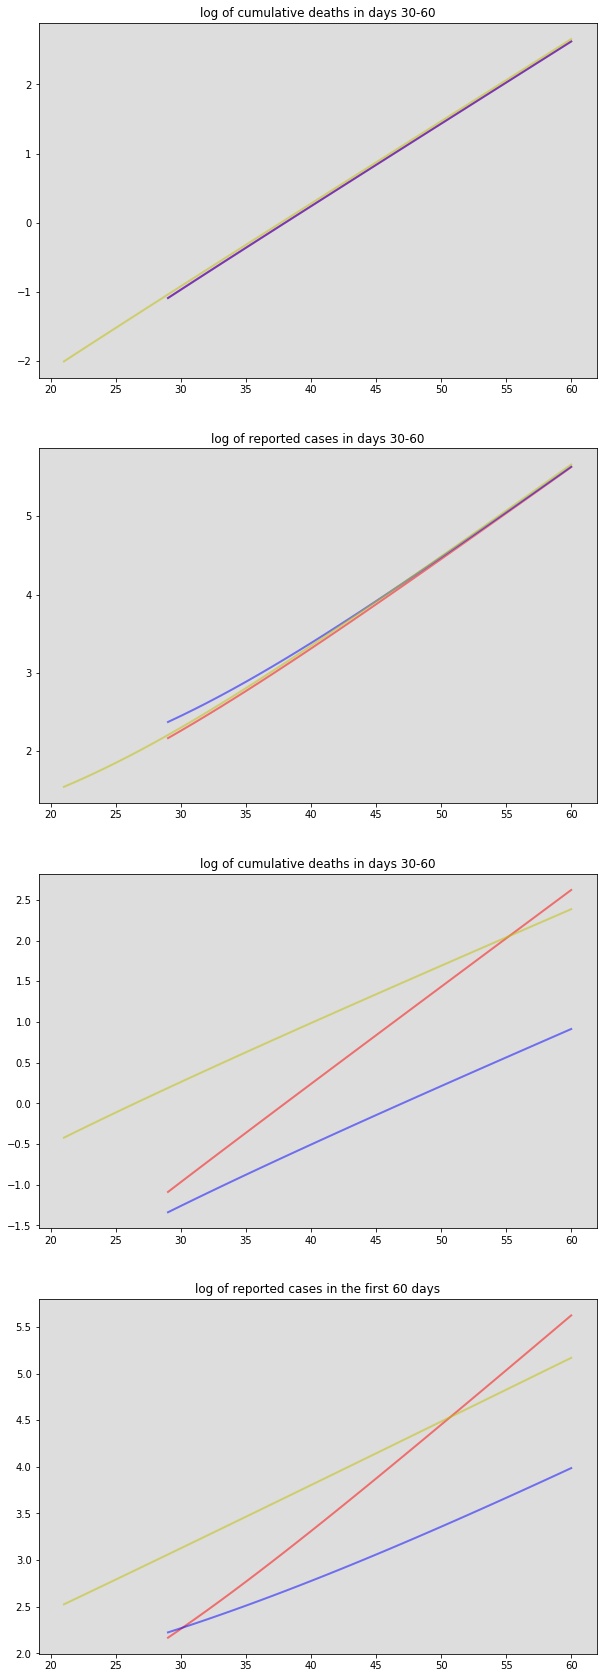

In [10]:
'''
Plot the log data
'''
fig2 = plt.figure(facecolor='w', figsize=(10, 30))

ax21 = fig2.add_subplot(4, 1, 1, facecolor='#dddddd', axisbelow=True)
ax21.plot(t1_ST[30:], np.log(D1_ST[30:]), 'r', alpha=0.5, lw=2, label='CFR=0.01, lambd=0.2, E0=2, I0=2, T0=2, R=5')
ax21.plot(t2_ST[30:], np.log(D2_ST[30:]), 'b', alpha=0.5, lw=2, label='CFR=0.005, lambd=0.1, E0=4, I0=4, T0=2, R=5')
ax21.plot(t3_ST[30:], np.log(D3_ST[30:]), 'y', alpha=0.5, lw=2, label='CFR=0.004, lambd=0.08, E0=2, I0=2, T0=10, R=5')
ax21.set_title('log of cumulative deaths in days 30-60')

ax22 = fig2.add_subplot(4, 1, 2, facecolor='#dddddd', axisbelow=True)
ax22.plot(t1_ST[30:], np.log(C1_ST[30:]), 'r', alpha=0.5, lw=2, label='CFR=0.01, lambd=0.2, E0=2, I0=2, T0=2, R=5')
ax22.plot(t2_ST[30:], np.log(C2_ST[30:]), 'b', alpha=0.5, lw=2, label='CFR=0.005, lambd=0.1, E0=4, I0=4, T0=2, R=5')
ax22.plot(t3_ST[30:], np.log(C3_ST[30:]), 'y', alpha=0.5, lw=2, label='CFR=0.004, lambd=0.08, E0=2, I0=2, T0=10, R=5')
ax22.set_title('log of reported cases in days 30-60')

ax23 = fig2.add_subplot(4, 1, 3, facecolor='#dddddd', axisbelow=True)
ax23.plot(t4_ST[30:], np.log(D4_ST[30:]), 'r', alpha=0.5, lw=2, label='CFR=0.01, lambd=0.2, R=5')
ax23.plot(t5_ST[30:], np.log(D5_ST[30:]), 'b', alpha=0.5, lw=2, label='CFR=0.01, lambd=0.2, R=3')
ax23.plot(t6_ST[30:], np.log(D6_ST[30:]), 'y', alpha=0.5, lw=2, label='CFR=0.05, lambd=0.8, R=3')
ax23.set_title('log of cumulative deaths in days 30-60')

ax24 = fig2.add_subplot(4, 1, 4, facecolor='#dddddd', axisbelow=True)
ax24.plot(t4_ST[30:], np.log(C4_ST[30:]), 'r', alpha=0.5, lw=2, label='CFR=0.01, lambd=0.2, R=5')
ax24.plot(t5_ST[30:], np.log(C5_ST[30:]), 'b', alpha=0.5, lw=2, label='CFR=0.01, lambd=0.2, R=3')
ax24.plot(t6_ST[30:], np.log(C6_ST[30:]), 'y', alpha=0.5, lw=2, label='CFR=0.05, lambd=0.8, R=3')
ax24.set_title('log of reported cases in days 30-60')

for ax in [ax21, ax22, ax23, ax24, ax25, ax26]:
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    
plt.show()

# Estimation

## Read Data

In [54]:
'''
Read the dataset with population of different states in the US
Taken from the US Census Bureau https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html
'''
US_Population_df = pd.read_excel('Data/Annual Estimates of the Resident Population for the United States 2010-2019.xlsx',
                                 header=None)
US_Ns = pd.Series(
    data=US_Population_df.loc[4:61, 12].values, index=US_Population_df.loc[4:61, 0])
'''
Read the dataset with population of different countries
Taken from World Population Prospects 2019 by United Nations https://population.un.org/wpp/Download/Standard/Population/
'''
Global_Population_df = pd.read_excel('Data/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx',
                                     header=None)
Global_Ns = pd.Series(data=Global_Population_df.loc[17:, 76].values,
                      index=Global_Population_df.loc[17:, 2])
'''
Read the COVID dataset with the state level data for the US collected by the New York Times
Taken from https://github.com/nytimes/covid-19-data
'''
US_Covid_df = pd.read_excel(
    'Data/time_series_covid19_confirmed_deaths_US_states_21Jan20_30June20.xlsx', 'US states data')
'''
Read the COVID dataset with the country level data collected
by the Center for Systems Science and Engineering at Johns Hopkins University
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
'''
Global_Covid_df_C = pd.read_excel('Data/time_series_covid19_confirmed_deaths_recovered_global_22Jan20_30June20.xlsx',
                                  'confirmed')
Global_Covid_df_C = Global_Covid_df_C.T
Global_Covid_df_C.columns = Global_Covid_df_C.loc['Country/Region']
Global_Covid_df_C.drop('Country/Region', inplace=True)

Global_Covid_df_D = pd.read_excel('Data/time_series_covid19_confirmed_deaths_recovered_global_22Jan20_30June20.xlsx',
                                  'deaths')
Global_Covid_df_D = Global_Covid_df_D.T
Global_Covid_df_D.columns = Global_Covid_df_D.loc['Country/Region']
Global_Covid_df_D.drop('Country/Region', inplace=True)

Global_Covid_df_R = pd.read_excel('Data/time_series_covid19_confirmed_deaths_recovered_global_22Jan20_30June20.xlsx',
                                  'recovered')
Global_Covid_df_R = Global_Covid_df_R.T
Global_Covid_df_R.columns = Global_Covid_df_R.loc['Country/Region']
Global_Covid_df_R.drop('Country/Region', inplace=True)

In [94]:
US_D = Global_Covid_df_D['US'].loc[pd.Timestamp('2020-01-22'):pd.Timestamp('2020-06-30')].astype('float')
US_C = Global_Covid_df_C['US'].loc[pd.Timestamp('2020-01-22'):pd.Timestamp('2020-06-30')].astype('float')
US_R = Global_Covid_df_R['US'].loc[pd.Timestamp('2020-01-22'):pd.Timestamp('2020-06-30')].astype('float')

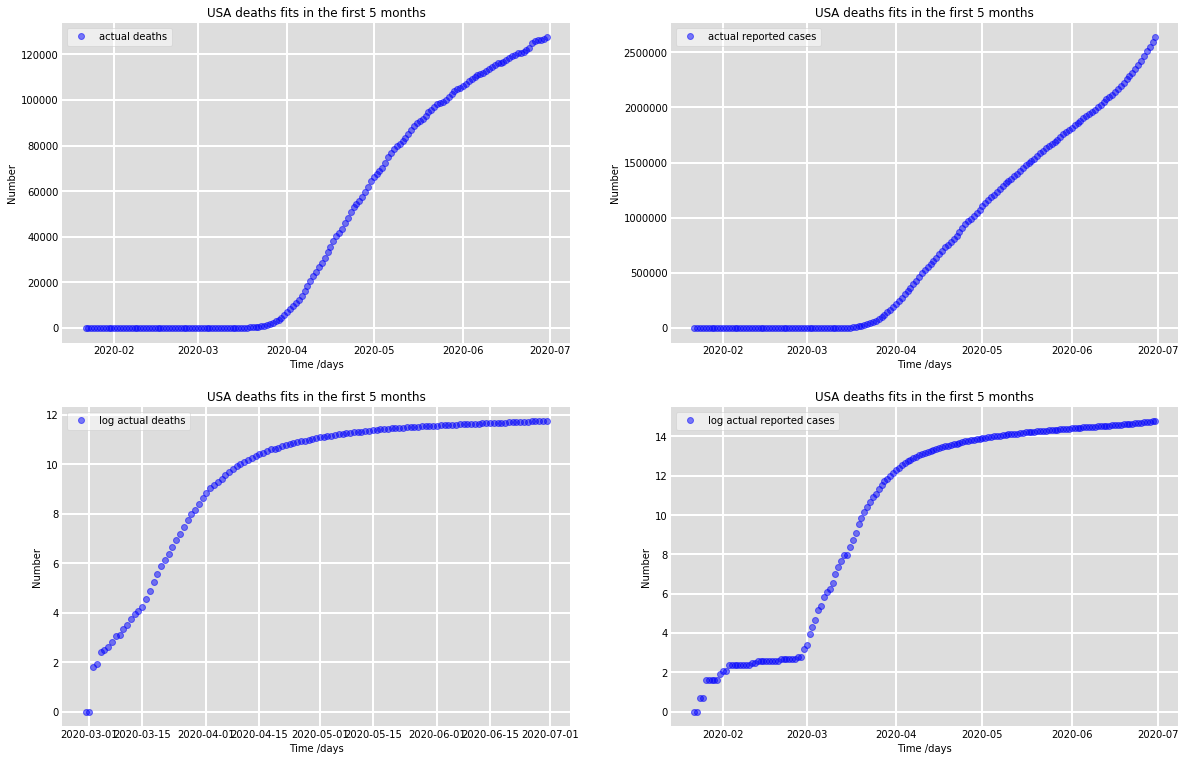

In [99]:
'''
Plot the log data
'''
fig3 = plt.figure(facecolor='w', figsize=(20, 20))

ax31 = fig3.add_subplot(3, 2, 1, facecolor='#dddddd', axisbelow=True)
ax31.plot(US_D, 'bo', alpha=0.5, lw=2, label='actual deaths')
ax31.set_title('USA deaths fits in the first 5 months')

ax32 = fig3.add_subplot(3, 2, 2, facecolor='#dddddd', axisbelow=True)
ax32.plot(US_C, 'bo', alpha=0.5, lw=2, label='actual reported cases')
ax32.set_title('USA Reported Cases fits in the first 5 months')

ax33 = fig3.add_subplot(3, 2, 3, facecolor='#dddddd', axisbelow=True)
ax33.plot(np.log(US_D[US_D != 0]), 'bo', alpha=0.5,
          lw=2, label='log actual deaths')
ax33.set_title('USA Lof Deaths fits in the first 5 months')

ax34 = fig3.add_subplot(3, 2, 4, facecolor='#dddddd', axisbelow=True)
ax34.plot(np.log(US_C[US_C != 0]), 'bo', alpha=0.5,
          lw=2, label='log actual reported cases')
ax34.set_title('USA Log Reported Cases fits in the first 5 months')

for ax in [ax31, ax32, ax33, ax34]:
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)

plt.show()

In [ ]:
'''
Fix T0=1, I=0
Start with E0=1
'''